# Credit Card Churn Analysis & Prediction

# 1. Introduction

Customer churn prediction is a key part of any organization that offers recurring services. Churn predictions allow us to analyze a dataset of a company's customers and if they are an active customer or if they cancelled services, and model this data to predict future customers who may cancel services. This allows the company to take action to try to prevent the user from cancelling their service.

In this notebook, we will brielfy analyze a dataset of credit card customers and whether or not they continue services. We will then preprocess the data, and train a classification model to predict which customers may cancel their credit card services.

- CLIENTNUM:	Unique client number
- Attrition_Flag:	Target variable. Customer churn
- Customer_Age: Customer's Age in Years
- Gender: MMale, F=Female
- Dependent_count: Number of dependents
- Education_Level: Customer education level
- Marital_Status:	Married, Single, Divorced, Unknown
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card (Blue, Silver, Gold, Platinum)
- Monthsonbook:	Period of relationship with bank
- TotalRelationshipcount:	Total number of products held by the customer
- MonthsInactive12_mon:	Number of months inactive in the last 12 months
- ContactsCount12_mon:	Number of contacts in the last 12 months
- Credit_Limit:	Credit card credit limit
- TotalRevolvingBal:	Total revolving balance
- AvgOpenTo_Buy:	Open to Buy Credit Line (Average of last 12 months)
- TotalAmtChngQ4Q1:	Change in Transaction Amount (Q4 over Q1)
- TotalTransAmt:	Total Transaction Amount (Last 12 months)
- TotalTransCt:	Total Transaction Count (Last 12 months)
- TotalCtChngQ4Q1:	Change in Transaction Count (Q4 over Q1)
- AvgUtilizationRatio:	Average Card Utilization Ratio

# 2. Import Libraries & Load Data

In [65]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("grayscale")
sns.set_palette('pastel')
from tqdm import tqdm

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [66]:
# Load Data
file = ('/kaggle/input/credit-card-customers-prediction/BankChurners.csv')
data = pd.read_csv(file, index_col=0)

In [67]:
# Create list of columns we will use
cols_to_use = list(data.columns[0:-2])

In [68]:
# Create dataframe
df = data[cols_to_use]

In [69]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# 3. Basic Exploration

In [70]:
df.shape

(10127, 20)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [72]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# 4. Quick EDA

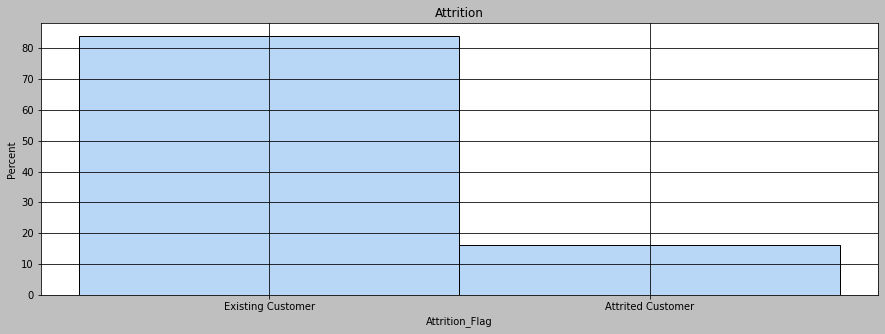

In [123]:
plt.figure(figsize=(15,5))
plt.title('Attrition')
plt.grid()
g = sns.histplot(x='Attrition_Flag', data=df, stat='percent')

### About 85% of the dataset is existing customers, and about 15% is attrited or churned customers

Loading...: 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]


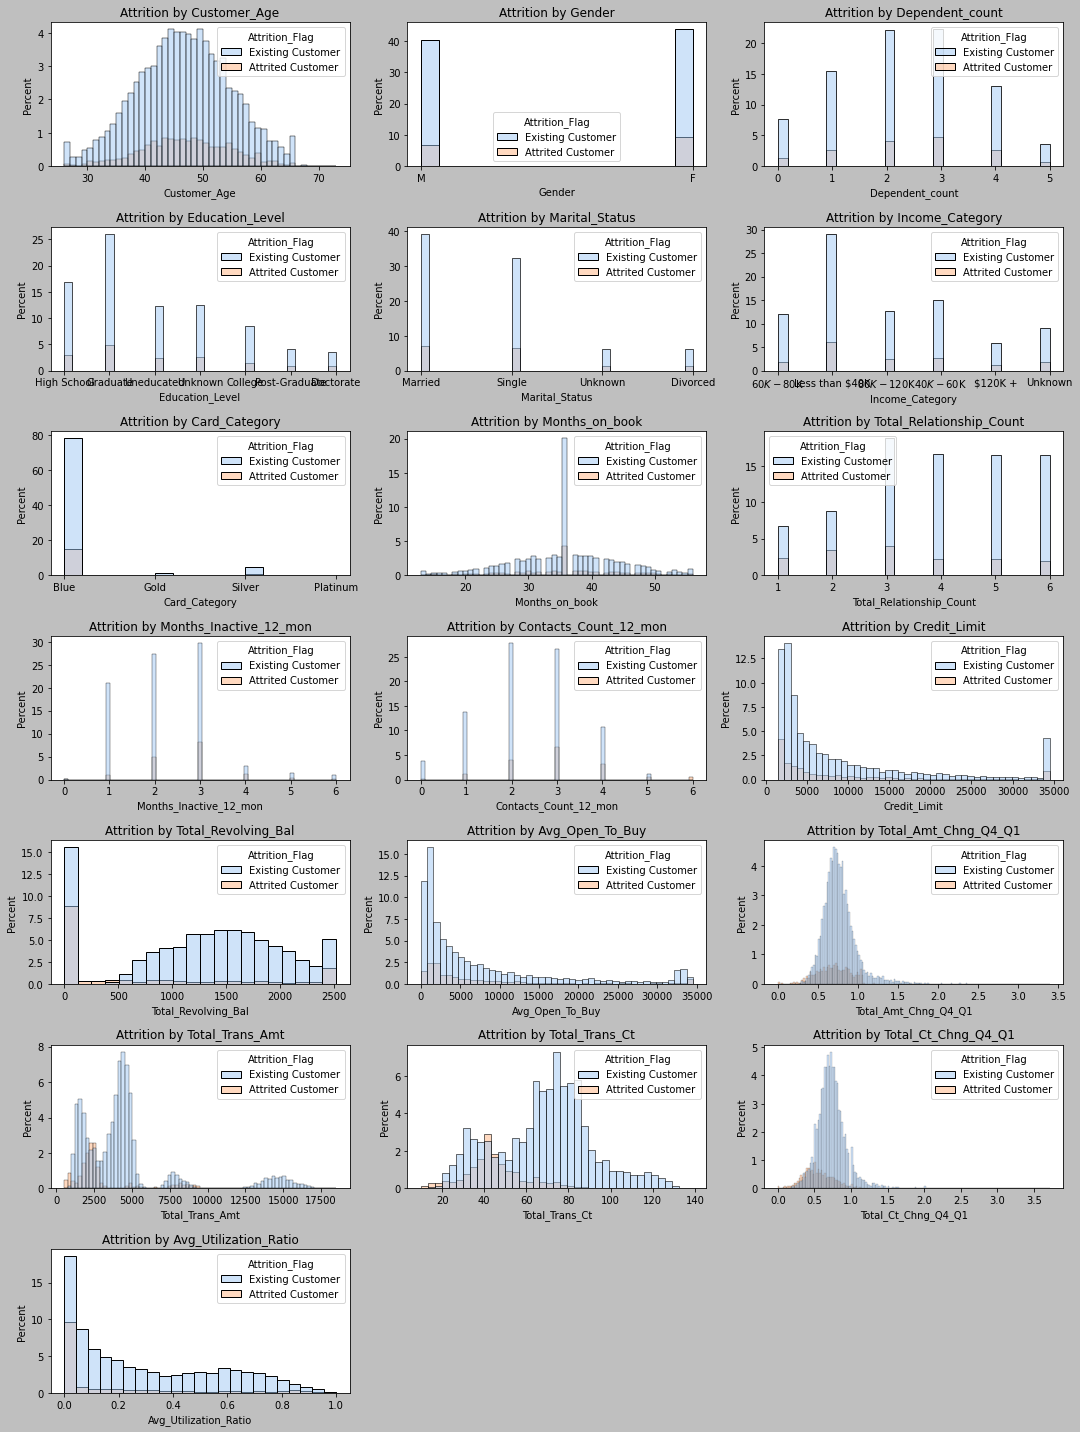

In [126]:
plt.figure(figsize = (15,20))
plotnumber = 1

for i in tqdm(range(1,20), desc="Loading..."):
        ax = plt.subplot(7, 3, plotnumber)
        sns.histplot(x = df.columns[i], hue=df['Attrition_Flag'], data = df, ax = ax, discrete=False, stat='percent')
        plt.title(f'Attrition by {df.columns[i]}')
        plotnumber += 1

plt.tight_layout()
plt.show()

### The above collection of plots show the distribuitions of the features of the dataset.

- Customer age is normally distributed with a mean of around mid-40s and attrition is also normally distributed by age
- There are slightly more women than men customers and women slightly more likely to churn
- Most customers credit limit is less than 5,000. There is a spike where people have the max credit limit
- Customers are more likely to leave is they havea very low credit score
- Customers who have 0 reolving balance are also more likely to leave
- Those with a low total transaction amount(under 3000) are more likely to cancel services
- Customers are also more likely to leave if they have relatively few total tranactions
- Finally, of those with an average utliziation ratio of 0, about half of them cancel

# 5. Preprocessing

In [75]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [76]:
# Create dataframe copy to perform preprocessing on
X_full = df.copy()

In [77]:
# Ordinal encode features
enc = OrdinalEncoder()
X_full[["Attrition_Flag","Gender", "Education_Level", 'Marital_Status', 'Income_Category', 'Card_Category']] = enc.fit_transform(X_full[["Attrition_Flag","Gender", "Education_Level", 'Marital_Status', 'Income_Category', 'Card_Category']])

In [78]:
X_full.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1.0,45,1.0,3,3.0,1.0,2.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,1.0,49,0.0,5,2.0,2.0,4.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,1.0,51,1.0,3,2.0,1.0,3.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,1.0,40,0.0,4,3.0,3.0,4.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,1.0,40,1.0,3,5.0,1.0,2.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<AxesSubplot:>

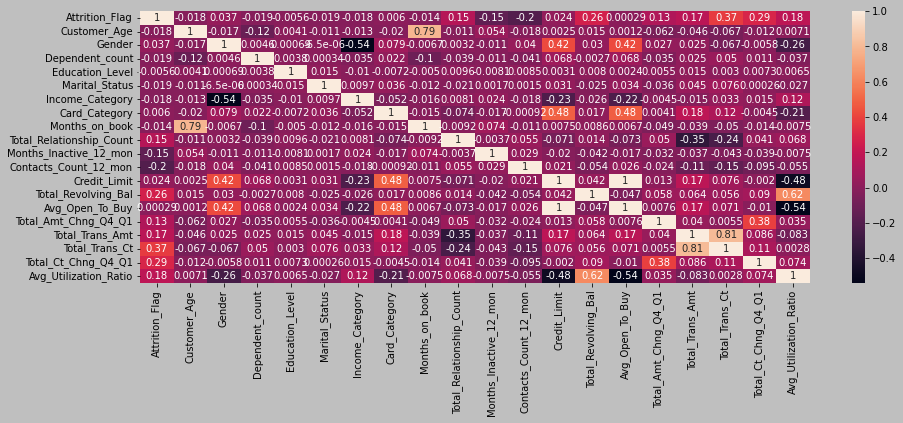

In [130]:
# Plot heatmap of correlation
plt.figure(figsize=(15, 5))
sns.heatmap(X_full.corr(), annot=True)

- Total_Trans_Ct is the most positively correlated feature with Attrition_Flag
    - Followed by Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio
- Total_Relationship_Count is the most negatively correlated features
    - Followed by Months_Inactive_12_mon

In [127]:
# Split dataset
X = X_full.copy()
y = X.pop('Attrition_Flag')

In [116]:
# MinMaxScale data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [117]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 6. Model

In [118]:
# Define model, fit, and score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb.score(X_test, y_test)

0.9731437598736177

# 7. Predict and Evaluate

In [119]:
# Use model to make predictions on test data
preds = xgb.predict(X_test)

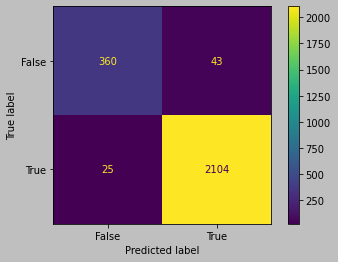

In [120]:
# Plot confusion matrix to evaluate model
confusion_matrix = metrics.confusion_matrix(y_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [133]:
y_test.shape

(2532,)

# 6. Conclusion

In this notebook, we managed to fit an XGBoost Classifier on our data and receive 97% accuracy, without any hyper-parameter tuning. As can be seen in the above confusion matrix, of our 2,532 test cases we managed to accurately predict 2,465.